In [17]:
#Para el Informe en OverLeaf: 
#si uso una palabra en inglés, escribirla en cursiva
#No puedo referenciar en el Resumen (\citep{2001AJ....121.2358B})

#Gaurdamos las imags (deben tener algo para diferenciar las líneas aún en B&W)

In [1]:
#Guía 4:

# Datos y Modelo

In [1]:
import pandas as pd #librería para datos
import matplotlib.pyplot as plt #para el hist
from scipy import stats as st
import numpy as np

LF = pd.read_csv('LF_Blanton2001.csv')
LF

,M,f
0,-23.192962,0.000003
1,-23.031074,0.000005
2,-22.902796,0.000017
3,-22.730154,0.000033
4,-22.590584,0.000082
5,-22.449972,0.000118
6,-22.244760,0.000236
7,-22.125964,0.000355
8,-21.963729,0.000545
9,-21.817953,0.000908


In [2]:
LF.rename(columns={' f': 'F'}, inplace=True) #tenía un espacio y no me daba bola por esoOooOOooo

In [3]:
LF

,M,F
0,-23.192962,0.000003
1,-23.031074,0.000005
2,-22.902796,0.000017
3,-22.730154,0.000033
4,-22.590584,0.000082
5,-22.449972,0.000118
6,-22.244760,0.000236
7,-22.125964,0.000355
8,-21.963729,0.000545
9,-21.817953,0.000908


In [6]:
#Cómo hacen ese tipo de gráfico (de papers)?

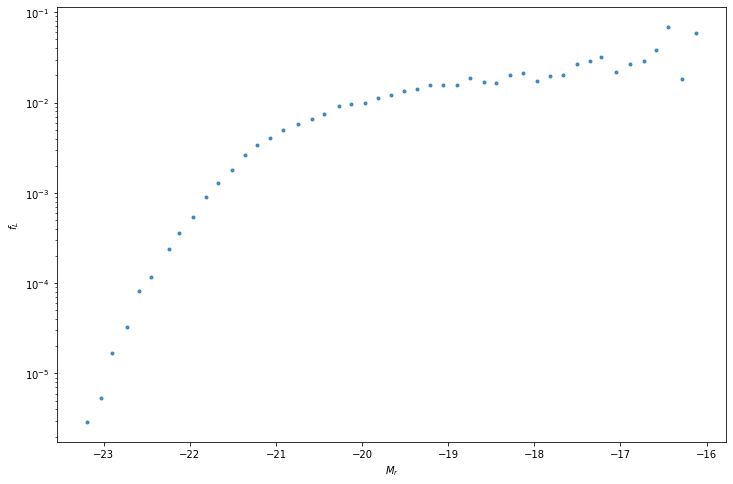

In [4]:
plt.figure(figsize=(12,8))
plt.plot(LF['M'],LF['F'],'.',alpha=0.8)
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$f_L$')
#plt.title('Datos de Blanton et al. (2001)')

plt.savefig('raw pts Blanton.png',dpi=300,bbox_inches='tight');

In [5]:
# ProbPost = L * Prior/Evidencia (Evidencia no es relevante porque el modelo es fijo)

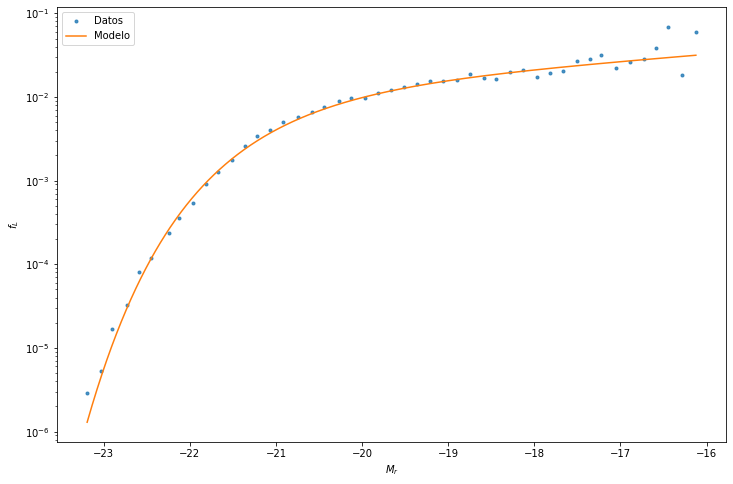

In [6]:
#Forma del modelo? Veamos:

phi = 0.0146
Mc = -20.83
alpha = -1.2

def f(M, Mc = -20.83, alpha = -1.2, phi = 0.0146): #Este es el modelo: M es la var indepte; Mc, phi y alpha parámetros.
    y = 0.4*np.log(10)*phi*(10**(-0.4*(M-Mc)*(alpha+1))) * np.exp(-10**(-0.4*(M-Mc))) 
    return y

a = np.amin(LF['M'])
b = np.amax(LF['M']) #que el dominio sea el mismo para la curva que para los puntos
x = np.linspace(a,b,1000)

plt.figure(figsize=(12,8))
plt.plot(LF['M'],LF['F'],'.',alpha=0.8,label='Datos')
plt.plot(x,f(x),label='Modelo')
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$f_L$')
#plt.title('Datos')
plt.legend()
#plt.savefig('pts vs model Blanton.png',dpi=300,bbox_inches='tight');

In [7]:
#Errores:

dy = np.empty(len(LF['F']))
dy = abs(f(LF['M'])-LF['F']) #Defino el error como el módulo de la dif entre f(x_i) (Modelo) y y(x_i) (Datos)

for i in range(1,len(dy)-3): #corto el loop 3 lugares por problemas con las barras de error del gráfico siguiente, no varía mucho.
    dy[i] = (dy[i-1] + dy[i] + dy[i+1])/3 #el error en un pt es el promedio de sus vecinos para no obtener dy_i = 0
    
dy #después, como asumimos errores gausseanos, la distrib de errores será ~ N(mu = f(x_i), sigma = dy)

0     0.000002
1     0.000003
2     0.000004
3     0.000009
4     0.000010
5     0.000012
6     0.000024
7     0.000050
8     0.000056
9     0.000037
10    0.000039
11    0.000103
12    0.000246
13    0.000320
14    0.000384
15    0.000422
16    0.000314
17    0.000296
18    0.000528
19    0.000670
20    0.000487
21    0.000283
22    0.000303
23    0.000453
24    0.000536
25    0.000764
26    0.000715
27    0.000436
28    0.000864
29    0.001175
30    0.001372
31    0.001282
32    0.000874
33    0.001889
34    0.002754
35    0.002565
36    0.002802
37    0.003469
38    0.004770
39    0.005157
40    0.003278
41    0.001529
42    0.003879
43    0.017532
44    0.039335
45    0.012312
46    0.028111
dtype: float64

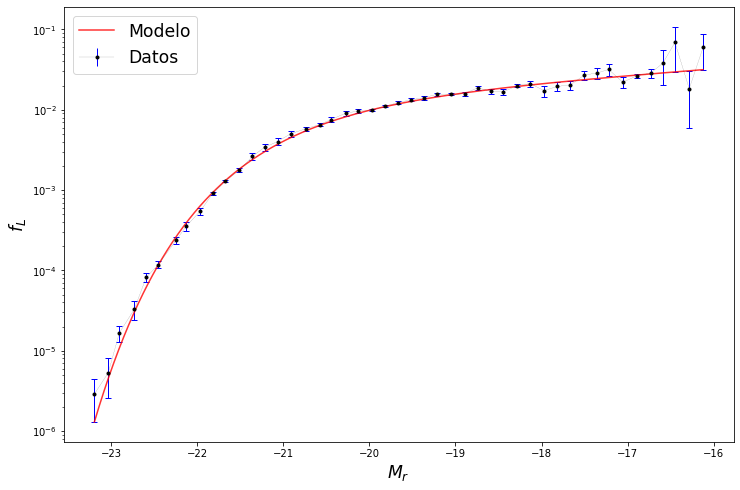

In [15]:
plt.figure(figsize=(12,8))
plt.errorbar(LF['M'],LF['F'], yerr= dy, marker='o', markersize=3, color='black', ecolor='blue', elinewidth=1, linewidth=0.1,label='Datos')
plt.plot(LF['M'],LF['F']-dy, '_', color='blue')
plt.plot(LF['M'],LF['F']+dy, '_', color='blue')
plt.plot(x,f(x),label='Modelo',color='red',alpha=0.8)
plt.yscale('log')
plt.xlabel('$M_r$',fontsize='xx-large')
plt.ylabel('$f_L$',fontsize='xx-large')
#plt.title('Errores resepcto al modelo de Blanton')
plt.legend(fontsize='xx-large')
plt.savefig('pts and model w error Blanton.png',dpi=300,bbox_inches='tight');

# Likelihood, Prior y Prob Post

In [16]:
#Likelihood = produc P(x|modelo) (porque los x_i son indeptes) => produc y(x_i) (mediciones dado el modelo); y_i = y_i + sigma 
#(puede ser un random sacado de una distrib normal de cada punto (calc antes)).

def likelihood(M, F, phi, Mc, alpha, dy):
    y = f(M, Mc, alpha, phi) #func modelo dados los parámetros ingresados
    
    y = st.norm(y, dy).pdf(F) #le agrego un error gausseano random. Notar que len(M) = len(dy)
    
    #hago la productoria
    L=y.prod()
    return L

In [17]:
#Pruebo (try 3):

likelihood(M = LF['M'],F = LF['F'],Mc = -20.83, alpha = -1.2, phi = 0.0146, dy=dy)

1.7090951717423144e+129

In [18]:
#Y si cambiamos los valores de los parámetros, debería ser menor el Likelihood:

likelihood(M = LF['M'],F = LF['F'],Mc = -20.83, alpha = -1.1, phi = 0.0146, dy=dy) #alpha' = alpha + 0.1

8.62462615318102e+75

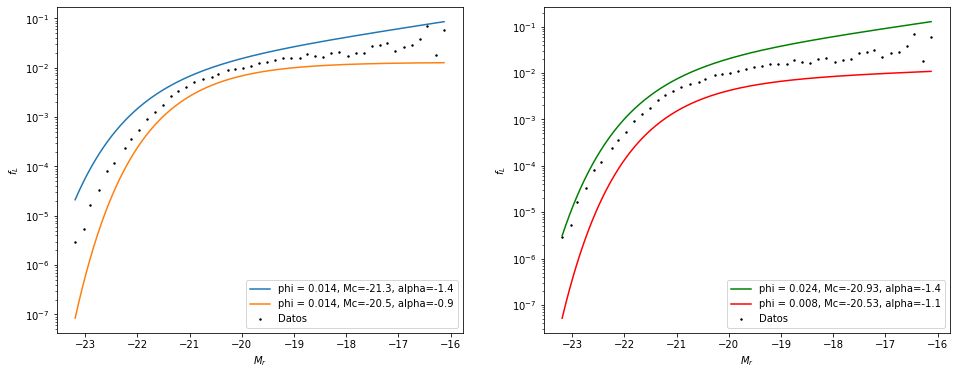

In [19]:
#Para los priors, ver en qué rangos son admisibles los parámetros (graficar para difs posibilidades).

plt.figure(figsize=(16,6))

#plt.suptitle('Posibles envolventes')

plt.subplot(1,2,1)   #figura con 1 fila y 2 columnas
plt.plot(x,f(x, phi = 0.014, Mc=-21.3, alpha=-1.4), label='phi = 0.014, Mc=-21.3, alpha=-1.4')
plt.plot(x,f(x, phi = 0.014, Mc=-20.5, alpha=-1.0), label='phi = 0.014, Mc=-20.5, alpha=-0.9')
plt.scatter(LF['M'],LF['F'], color='black', s=2, label='Datos')
plt.legend()
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$f_L$')

plt.subplot(1,2,2)   #2º espacio
plt.plot(x,f(x, phi = 0.024, Mc=-20.93, alpha=-1.4), label='phi = 0.024, Mc=-20.93, alpha=-1.4',color='green')
plt.plot(x,f(x, phi = 0.008, Mc=-20.53, alpha=-1.1), label='phi = 0.008, Mc=-20.53, alpha=-1.1',color='red')
plt.scatter(LF['M'],LF['F'], color='black', s=2, label='Datos')
plt.legend()
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$f_L$');

In [20]:
#Por lo tanto, alpha = (-1.4,-1.0); phi = (0.008,0.024) y Mc = (-21.3,-20.5) ¿O los exagero más?
#Es decir, dalpha = 0.2, dphi = 0.008 y dMc = 0.4 

#Mepa que los queiro exagerar más para que sea más grande el cubo del prior

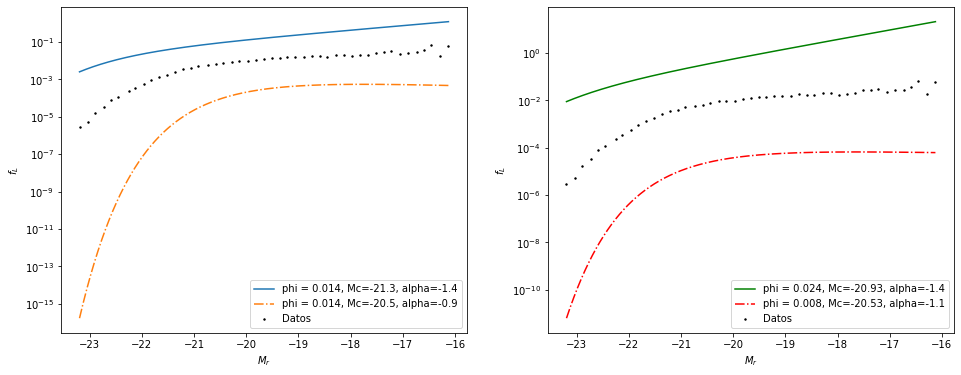

In [21]:
#Try 2 (más exagerado):

#hacemos 1 línea punteada como para diferenciar

plt.figure(figsize=(16,6))

#plt.suptitle('Posibles envolventes (exageradas)')

plt.subplot(1,2,1)   #figura con 1 fila y 2 columnas
plt.plot(x,f(x, phi = 0.044, Mc=-22.3, alpha=-1.6), label='phi = 0.014, Mc=-21.3, alpha=-1.4')
plt.plot(x,f(x, phi = 0.001, Mc=-19.5, alpha=-0.8), label='phi = 0.014, Mc=-20.5, alpha=-0.9', ls='-.')
plt.scatter(LF['M'],LF['F'], color='black', s=2, label='Datos')
plt.legend()
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$f_L$')

plt.subplot(1,2,2)   #2º espacio
plt.plot(x,f(x, phi = 0.044, Mc=-22.93, alpha=-2), label='phi = 0.024, Mc=-20.93, alpha=-1.4',color='green')
plt.plot(x,f(x, phi = 0.0001, Mc=-20.13, alpha=-0.9), label='phi = 0.008, Mc=-20.53, alpha=-1.1',color='red', ls='-.')
plt.scatter(LF['M'],LF['F'], color='black', s=2, label='Datos')
plt.legend()
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$f_L$')

plt.savefig('param exag.png',dpi=300,bbox_inches='tight');

In [22]:
#Por lo tanto, alpha = (-2.0,-0.8); phi = (0.001,0.044) y Mc = (-23.0,-19.5)
#O sea, dalpha = 1.2, dphi = 0.043 y dMc = 3.5

In [23]:
#Entonces escribo mi Prior:
#Después supongo una distrib uniforme para cada parámetro: En 'loc' arranca y 'scale' es el largo del escalón.

def prior(phi,Mc,alpha):
    p=st.uniform(loc=[0.001, -23.0, -2.0], scale=[0.043, 3.5, 1.2])  #Región (3 parámetros => 3D) de largo dalpha, dphi y dMc
    r=p.pdf([phi,Mc,alpha]) #evaluo en un punto adentro de la región 
    t=r.prod() #Multiplico las P (indeptes entre si)
    return t

In [24]:
#Probamos con los valores de Blanton

prior(0.0146,-20.83,-1.2)

5.537098560354375

In [25]:
#Y con otros valores...

prior(0.0146,-24,-2.5)

0.0

In [26]:
#Porque es uniforme sólo vale ese Nº (5.53...) o 0, si es que entra en la región definida o no

#Una vez calculado el Likelihood y el Prior, puedo tener mi Posterior:

def post(M,F, phi, Mc, alpha, dy): #se come todos los args que se comen nuestras 2 func defs anteriormente
    y = likelihood(M,F,phi,Mc,alpha,dy) * prior(phi,Mc,alpha)
    return y

In [27]:
#Prueba con los valores del paper:

post(M = LF['M'],F = LF['F'],Mc = -20.83, alpha = -1.2, phi = 0.0146, dy=dy)

9.463428414962982e+129

In [28]:
#Prueba con otros valores:

post(M = LF['M'],F = LF['F'],Mc = -20.83, alpha = -1.3, phi = 0.01, dy=dy)

3.26768168039718e-74

# MCMC MH

In [29]:
#Entonces, comencemos a construir la MCMC con el método de M-H:

#Defino una func Proposal (La proposal distribution es lo que se propone para el salto de parámetros.
#Se asume una distribución gaussiana centrada en el paso anterior y el sigma depende del parámetro ya 
#que debe ser el indicado para que los saltos tengan el tamaño adecuado):

import functools
import random

#Asigno como sigma de cada gausseana (correspondiente a cada parámetro) al ~ 0.1% del valor original:
sigma_phi = 0.00001
sigma_Mc = 0.001
sigma_alpha = 0.001

proposal = functools.partial(np.random.multivariate_normal, cov = [[sigma_phi, 0 , 0], [0, sigma_Mc, 0], [0,0,sigma_alpha]])

In [30]:
prop = proposal([0.02,-21,-1.5])
p = post(M = LF['M'],F = LF['F'], phi=prop[0], Mc=prop[1], alpha=prop[2], dy=dy)
p

0.0

In [94]:
#Entonces, para cada cadena, un nuevo paso está dado por la función proposal evaluada en el paso anterior.
#Se calcula la probabilidad de aceptación como el mínimo entre 1 y la razón post_(i+1)/post_i.
#Se genera un número aleatorio 'x' entre 0 y 1, y si x es menor a la probabilidad de aceptacion se acepta el paso.

#Para elegir los parámetros iniciales de la cadena se sortean inicialmente en el rango que se definió el prior.

#Escribamos la cadena:

p = 0 #variable para el loop ("prob post")

while p < (10**-16) or p > (10**20): #es lo que pido para las condc inic: tiro randoms hasta que no se cumpla
    #Queremos que el valor inic no sea tan bueno (p > 10^30)
    
    #debe ser un punto adentro de la región donde definí mis parámetros (3D)
    phi_i = random.uniform(0.001,0.044)
    Mc_i = random.uniform(-23.0,-19.5)
    alpha_i = random.uniform(-2.0,-0.8)

    p = post(M = LF['M'],F = LF['F'], phi=phi_i, Mc=Mc_i, alpha=alpha_i, dy=dy) #la prob post de estos parametros iniciales

In [95]:
p 

124.65754821845795

In [96]:
#Guardo los n pasos de la cadena en listas:

n = 5000
cad_phi = np.empty(n)
cad_Mc = np.empty(n)
cad_alpha = np.empty(n)
posts = np.empty(n)

#el 1º lugar es el lugar de partida, con su correspondiente prob post
cad_phi[0] = phi_i
cad_Mc[0] = Mc_i
cad_alpha[0] = alpha_i
posts[0] = p

for i in range(1,n):
    
    phi_new, Mc_new, alpha_new = proposal([phi_i, Mc_i, alpha_i]) #los nuevos parámetros, dado el salto de la proposal

    p_new = post(M = LF['M'],F = LF['F'], phi=phi_new, Mc=Mc_new, alpha=alpha_new, dy=dy) #prob post nueva

    prob_acept = min(1, p_new/p) #el criterio de aceptación
    x = random.random() #random para aceptar el nuevo paso
    
    if x < prob_acept: #condición para aceptar el nuevo punto en el espacio de parámetros
        #Si se cumple, nos paramos en este punto (reemplazamos los valores iniciales)
                
        phi_i = phi_new
        Mc_i = Mc_new
        alpha_i = alpha_new
        p = p_new
    
    #Por qué no puedo poner un 'else: continue' acá?
    
    cad_phi[i] = phi_i
    cad_Mc[i] = Mc_i
    cad_alpha[i] = alpha_i
    posts[i] = p

### Walk

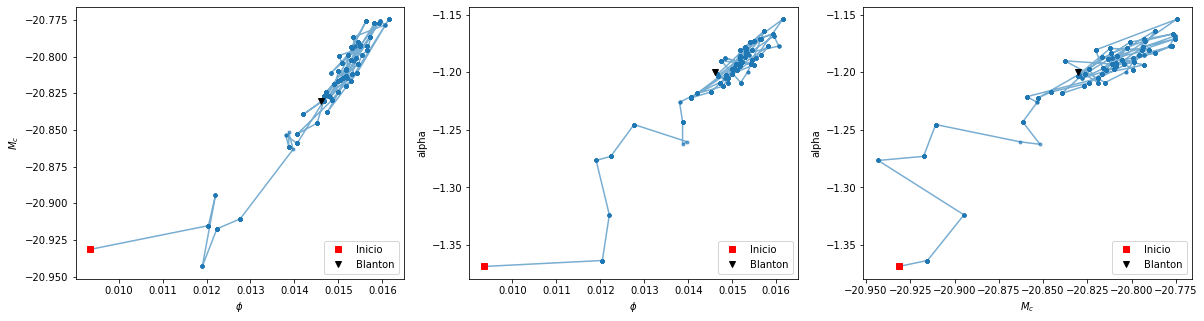

In [97]:
#Visualicemos la evolución parámetro vs parámetro;

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(cad_phi,cad_Mc,marker='.',alpha=0.6)
plt.plot(cad_phi[0], cad_Mc[0], 's', color='red', label='Inicio') #valores de los parámetros iniciales
plt.plot(0.0146,-20.83,'v', label='Blanton',color='black') #Valores de Blanton
plt.legend(loc='lower right')
plt.xlabel('$\phi$')
plt.ylabel('$M_c$')
#plt.xlim(0.001,0.044)
#plt.ylim(-23.0,-19.5)

plt.subplot(1,3,2)
plt.plot(cad_phi, cad_alpha,marker='.',alpha=0.6)
plt.plot(cad_phi[0], cad_alpha[0], 's', color='red', label='Inicio')
plt.plot(0.0146,-1.2,'v', label='Blanton',color='black')
plt.legend(loc='lower right')
plt.xlabel('$\phi$')
plt.ylabel('alpha')
#plt.xlim(0.001,0.044)
#plt.ylim(-2.0,-0.8)

plt.subplot(1,3,3)
plt.plot(cad_Mc, cad_alpha,marker='.',alpha=0.6)
plt.plot(cad_Mc[0], cad_alpha[0], 's', color='red', label='Inicio')
plt.plot(-20.83,-1.2,'v', label='Blanton',color='black')
plt.legend(loc='lower right')
plt.xlabel('$M_c$')
plt.ylabel('alpha')
#plt.xlim(-23.0,-19.5)
#plt.ylim(-2.0,-0.8)

plt.savefig('pi vs pj MCMC MH walk',dpi=300,bbox_inches='tight');

In [98]:
#Te juro que no entiendo por qué hace saltos tan gradnes y rarísimos (problema de aceptación?)
#AMIGO ERA EL 'ELSE: CONTINUE' DESDE CUAAAANDOOO?????????????

### Step

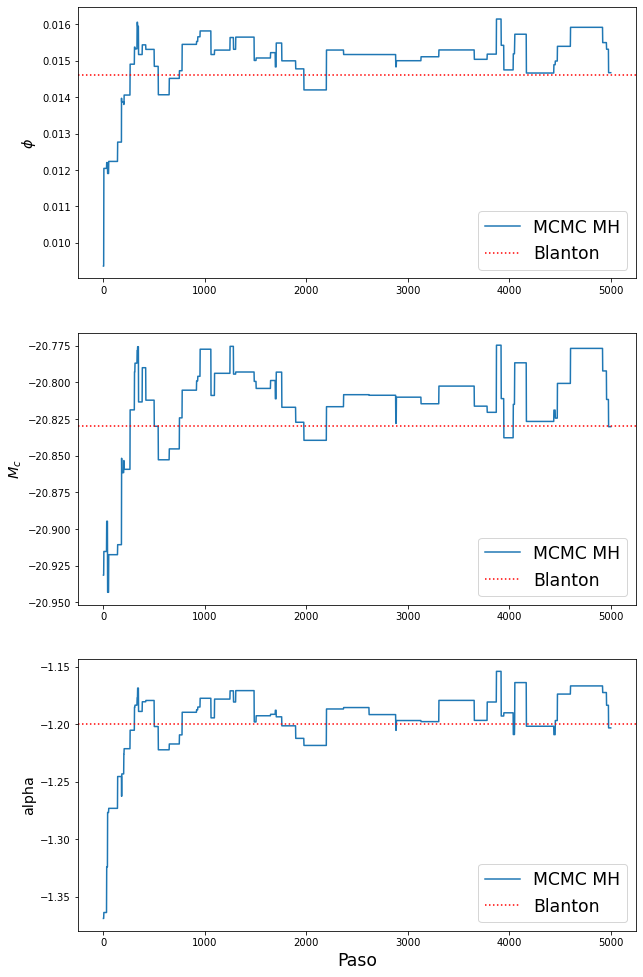

In [102]:
#Notamos una acumulación alrededor de los valores de Blanton (pero no exactamente alred, sino que para valores un poco mayores).
#Grafiquemos Parámetro vs paso:

plt.figure(figsize=(10,17))

plt.subplot(3,1,1)
plt.plot(cad_phi,label = 'MCMC MH')
plt.axhline(0.0146, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='lower right',fontsize='xx-large')
plt.ylabel('$\phi$',fontsize='x-large')

plt.subplot(3,1,2)
plt.plot(cad_Mc,label = 'MCMC MH')
plt.axhline(-20.83, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='lower right',fontsize='xx-large')
plt.ylabel('$M_c$',fontsize='x-large')

plt.subplot(3,1,3)
plt.plot(cad_alpha,label = 'MCMC MH')
plt.axhline(-1.2, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='lower right',fontsize='xx-large')
plt.ylabel('alpha',fontsize='x-large')
plt.xlabel('Paso',fontsize='xx-large')

plt.savefig('param vs MCMC MH step',dpi=300,bbox_inches='tight');

### Hist

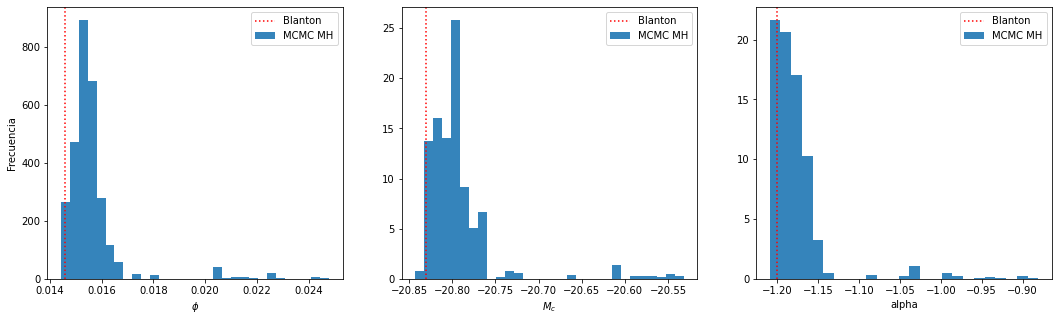

In [37]:
#Qué tan desviado estoy? Miremos los histogramas:

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(cad_phi,bins=30,density=True,alpha=0.9,label = 'MCMC MH') #por default y en auto es feo
plt.axvline(0.0146, color='red', label='Blanton', ls="dotted") #valor esperado
plt.legend(loc='upper right')
plt.xlabel('$\phi$')
plt.ylabel('Frecuencia')

plt.subplot(1,3,2)
plt.hist(cad_Mc,bins=30,density=True,alpha=0.9,label = 'MCMC MH')
plt.axvline(-20.83, color='red', label='Blanton', ls="dotted")
plt.legend(loc='upper right')
plt.xlabel('$M_c$')

plt.subplot(1,3,3)
plt.hist(cad_alpha,bins=25,density=True,alpha=0.9,label = 'MCMC MH')
plt.axvline(-1.2, color='red', label='Blanton', ls="dotted")
plt.legend(loc='upper right')
plt.xlabel('alpha')

plt.savefig('param vs MCMC MH hist',dpi=300,bbox_inches='tight');

## Dif cond inic

In [21]:
#Acá vemos mejor esto de que nuestros puntos oscilaban alrededor de valores mayores que los de Blanton (!). Pensemos en condc inic dist:

n = 5000
cad_phi = np.empty(n)
cad_Mc = np.empty(n)
cad_alpha = np.empty(n)
posts = np.empty(n)

#el 1º lugar es el lugar de partida, con su correspondiente prob post
cad_phi[0] = 0.03
cad_Mc[0] = -20
cad_alpha[0] = -1.0
posts[0] = post(M = LF['M'],F = LF['F'], phi=0.002, Mc=-22, alpha=-1.6, dy=dy)

for i in range(1,n):
    
    phi_new, Mc_new, alpha_new = proposal([phi_i, Mc_i, alpha_i]) #los nuevos parámetros, dado el salto de la proposal

    p_new = post(M = LF['M'],F = LF['F'], phi=phi_new, Mc=Mc_new, alpha=alpha_new, dy=dy) #prob post nueva

    prob_acept = min(1, p_new/p) #el criterio de aceptación
    x = random.random() #random para aceptar el nuevo paso
    
    if x < prob_acept: #condición para aceptar el nuevo punto en el espacio de parámetros
        #Si se cumple, nos paramos en este punto (reemplazamos los valores iniciales)
                
        phi_i = phi_new
        Mc_i = Mc_new
        alpha_i = alpha_new
        p = p_new
    
    #Por qué no puedo poner un 'else: continue' acá?
    
    cad_phi[i] = phi_i
    cad_Mc[i] = Mc_i
    cad_alpha[i] = alpha_i
    posts[i] = p

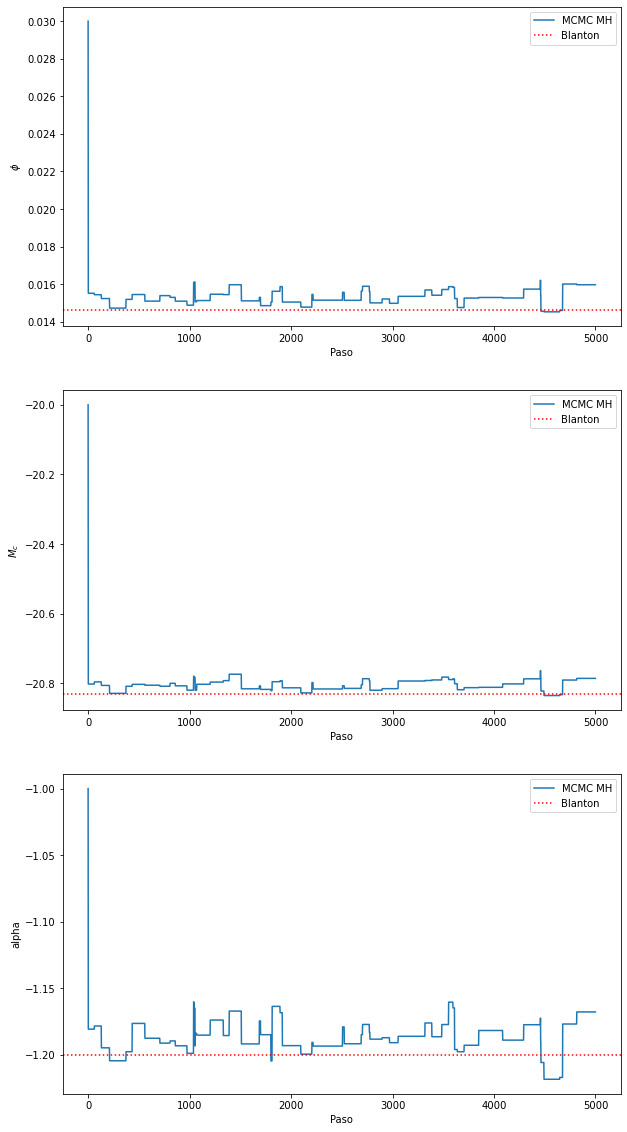

In [69]:
#Visualicemos la evolución parámetro vs parámetro;

plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.plot(cad_phi,label = 'MCMC MH')
plt.axhline(0.0146, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='upper right')
plt.ylabel('$\phi$')
plt.xlabel('Paso')

plt.subplot(3,1,2)
plt.plot(cad_Mc,label = 'MCMC MH')
plt.axhline(-20.83, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='upper right')
plt.ylabel('$M_c$')
plt.xlabel('Paso')

plt.subplot(3,1,3)
plt.plot(cad_alpha,label = 'MCMC MH')
plt.axhline(-1.2, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='upper right')
plt.ylabel('alpha')
plt.xlabel('Paso')

plt.savefig('fix param vs MCMC MH step',dpi=300,bbox_inches='tight');

In [40]:
#Si bien exageramos la condc inic en el otro extremo, sigue ocurriendo lo mismo: 
#Las cadenas convergen a valores distintos que los de Blanton (preg si está bie nque lo deje así o busque el error)
#Luego, puede que tengamos un problema a la hora de definir el likelihood o el prior, tal que tengo la mira torcida con la prob posterior.

In [38]:
#Las cadenas originales (no las de condc inic fijadas a mano) convergen (se estabilizan) para n ~ 2000 ('quemado)'.
#Entonces cortemos las cadenas desde ahí hasta el final y calculemos valores promedio:

m = 2000 #'n de quemado'
quem_phi = cad_phi[m:]
quem_Mc = cad_Mc[m:]
quem_alpha = cad_alpha[m:]

print('phi =',np.mean(quem_phi),'dphi =', np.std(quem_phi))
print('Mc =',np.mean(quem_Mc),'dMc =', np.std(quem_Mc))
print('alpha =',np.mean(quem_alpha),'dalpha =', np.std(quem_alpha))

phi = 0.015255769276137263 dphi = 0.00046424951956340106
Mc = -20.805666080986082 dMc = 0.01856038859239052
alpha = -1.1879995336467497 dalpha = 0.014922163012243483


# Mult MCMC MH

<ipython-input-39-582263707076>:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,1)
<ipython-input-39-582263707076>:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,3,2)
<ipython-input-39-582263707076>:85: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

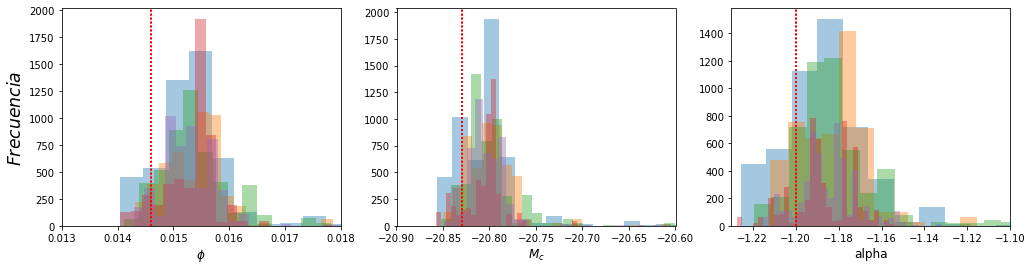

In [39]:
#Lo cual no está taaaaaaaaaan errado, veamos para k cadenas y calculemos el promedio de promedios de cada valor

plt.figure(figsize=(17,4))

k = 5 #cant de cadenas

phi_med = np.empty(k)
Mc_med = np.empty(k)
alpha_med = np.empty(k)

for j in range(k):

    p = 0 #variable para el loop ("prob post")

    while p < (10**-6) or p > (10**30): #es lo que pido para las condc inic: tiro randoms hasta que no se cumpla
        #Queremos que el valor inic no sea tan bueno (p > 10^30)
    
        #debe ser un punto adentro de la región donde definí mis parámetros (3D)
        phi_i = random.uniform(0.001,0.044)
        Mc_i = random.uniform(-23.0,-19.5)
        alpha_i = random.uniform(-2.0,-0.8)

        p = post(M = LF['M'],F = LF['F'], phi=phi_i, Mc=Mc_i, alpha=alpha_i, dy=dy) #la prob post de estos parametros iniciales
    
    n = 5000
    cad_phi = np.empty(n)
    cad_Mc = np.empty(n)
    cad_alpha = np.empty(n)
    posts = np.empty(n)

    #el 1º lugar es el lugar de partida, con su correspondiente prob post
    cad_phi[0] = phi_i
    cad_Mc[0] = Mc_i
    cad_alpha[0] = alpha_i
    posts[0] = p

    for i in range(1,n):
    
        phi_new, Mc_new, alpha_new = proposal([phi_i, Mc_i, alpha_i]) #los nuevos parámetros, dado el salto de la proposal

        p_new = post(M = LF['M'],F = LF['F'], phi=phi_new, Mc=Mc_new, alpha=alpha_new, dy=dy) #prob post nueva

        prob_acept = min(1, p_new/p) #el criterio de aceptación
        x = random.random() #random para aceptar el nuevo paso
    
        if x < prob_acept: #condición para aceptar el nuevo punto en el espacio de parámetros
            #Si se cumple, nos paramos en este punto (reemplazamos los valores iniciales)
                
            phi_i = phi_new
            Mc_i = Mc_new
            alpha_i = alpha_new
            p = p_new
    
        #Por qué no puedo poner un 'else: continue' acá?
    
        cad_phi[i] = phi_i
        cad_Mc[i] = Mc_i
        cad_alpha[i] = alpha_i
        posts[i] = p
    
    m = 2000 #'n de quemado'
    quem_phi = cad_phi[m:]
    quem_Mc = cad_Mc[m:]
    quem_alpha = cad_alpha[m:]

    phi_med[j] = np.mean(quem_phi) 
    Mc_med[j] = np.mean(quem_Mc)
    alpha_med[j] = np.mean(quem_alpha) #guardo las medias de cada parámetro de cada iteración
    
    #Grafico cada histograma:

    plt.subplot(1,3,1)
    plt.hist(cad_phi,bins=30,alpha=0.4) #por default y en auto es feo
    plt.axvline(0.0146, color='red', ls="dotted") #valor esperado
    plt.xlabel('$\phi$',fontsize='large')
    plt.ylabel('$Frecuencia$',fontsize='xx-large')
    plt.xlim(0.013,0.018)

    plt.subplot(1,3,2)
    plt.hist(cad_Mc,bins=30,alpha=0.4)
    plt.axvline(-20.83, color='red', ls="dotted")
    plt.xlabel('$M_c$',fontsize='large')
    plt.xlim(-20.9,-20.6)

    plt.subplot(1,3,3)
    plt.hist(cad_alpha,bins=30,alpha=0.4)
    plt.axvline(-1.2, color='red', ls="dotted")
    plt.xlabel('alpha',fontsize='large')
    plt.xlim(-1.23,-1.1)
    
plt.savefig('many param vs MCMC MH hist',dpi=300,bbox_inches='tight');

In [74]:
print('phi =',np.mean(phi_med))
print('Mc =',np.mean(Mc_med))
print('alpha =',np.mean(alpha_med)) #promedio de promedios

phi = 0.015351884031491871
Mc = -20.802772466163567
alpha = -1.1838061143138066


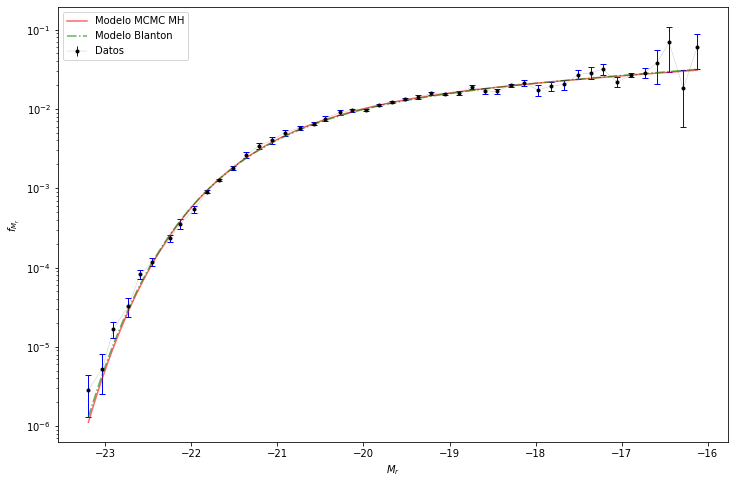

In [77]:
#Obtenidos mis valores, veamos el ajuste a nuestros datos:

a = np.amin(LF['M'])
b = np.amax(LF['M'])
x = np.linspace(a,b,1000)

plt.figure(figsize=(12,8))
plt.errorbar(LF['M'],LF['F'], yerr= dy, marker='o', markersize=3, color='black', ecolor='blue', elinewidth=1, linewidth=0.1,label='Datos')
plt.plot(LF['M'],LF['F']-dy, '_', color='blue')
plt.plot(LF['M'],LF['F']+dy, '_', color='blue')
plt.plot(x,f(x, Mc = np.mean(Mc_med), alpha = np.mean(alpha_med), phi = np.mean(phi_med)),label='Modelo MCMC MH',color='red',alpha=0.6)
plt.plot(x,f(x),label='Modelo Blanton',color='green',alpha=0.6,ls='-.')
plt.yscale('log')
plt.xlabel('$M_r$')
plt.ylabel('$f_{M_r}$')
#plt.title('Errores resepcto al modelo con valores obtenidos de MCMC-MH')
plt.legend()

plt.savefig('model Blanton vs MCMC MH',dpi=300,bbox_inches='tight');

In [45]:
#Lo cual tiene sus discrepancias, pero se la aguanta

#Pertenece al intervalo def por Blanton? PAAAAAAAAAAAALO Y ADENTRO SRAS Y SRES. SE GRITA COMO UN GOL Y CRÉANME QUE LO ES.
#Explicar (lo tengo escrito en algún lado) por qué usamos priors uniformes/planos
#Explicar los factores más importantes en la realización de las cadenas

#buscar cond inic para 1 mala cadena (que esté sesgada).
#Esto es, que mi condc inic sea muy buena. Si es muy buena, la prob post new va a ser mucho menor que la prob post_i =>
#Voy a necesitar muchos randoms para que la cadena de un paso. ¡No va a dar ningún paso si arranco con lso valopres de Blanton!

#Tirar 8 cadena, cada una desde un borde del 'cubo' de parámetros (para ver que hay sólo 1 máx)? Nah, al pedo

# Mal mixing

In [80]:
#Veamos pues, cuál sería una mala cadena. Esto es, probemos como condiciones iniciales de una MCMC MH, los valores de Blanton:

In [96]:
n = 5000
cad_phi = np.empty(n)
cad_Mc = np.empty(n)
cad_alpha = np.empty(n)
posts = np.empty(n)

#el 1º lugar es el lugar de partida, con su correspondiente prob post
cad_phi[0] = 0.0146
cad_Mc[0] = -20.83
cad_alpha[0] = -1.2
posts[0] = post(M = LF['M'],F = LF['F'], phi=0.0146, Mc=-20.83, alpha=-1.2, dy=dy)

for i in range(1,n):
    
    phi_new, Mc_new, alpha_new = proposal([phi_i, Mc_i, alpha_i]) #los nuevos parámetros, dado el salto de la proposal

    p_new = post(M = LF['M'],F = LF['F'], phi=phi_new, Mc=Mc_new, alpha=alpha_new, dy=dy) #prob post nueva

    prob_acept = min(1, p_new/p) #el criterio de aceptación
    x = random.random() #random para aceptar el nuevo paso
    
    if x < prob_acept: #condición para aceptar el nuevo punto en el espacio de parámetros
        #Si se cumple, nos paramos en este punto (reemplazamos los valores iniciales)
                
        phi_i = phi_new
        Mc_i = Mc_new
        alpha_i = alpha_new
        p = p_new
    
    #Por qué no puedo poner un 'else: continue' acá?
    
    cad_phi[i] = phi_i
    cad_Mc[i] = Mc_i
    cad_alpha[i] = alpha_i
    posts[i] = p

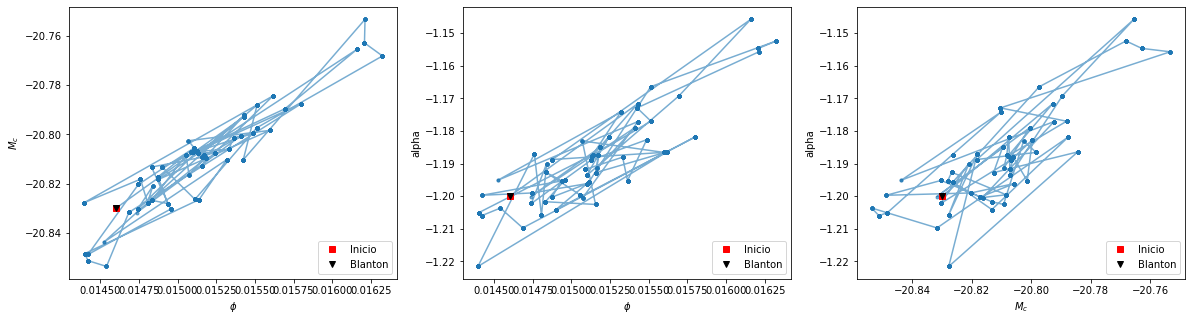

In [114]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.plot(cad_phi,cad_Mc,marker='.',alpha=0.6)
plt.plot(cad_phi[0], cad_Mc[0], 's', color='red', label='Inicio') #valores de los parámetros iniciales
plt.plot(0.0146,-20.83,'v', label='Blanton',color='black') #Valores de Blanton
plt.legend(loc='lower right')
plt.xlabel('$\phi$')
plt.ylabel('$M_c$')
#plt.xlim(0.001,0.044)
#plt.ylim(-23.0,-19.5)

plt.subplot(1,3,2)
plt.plot(cad_phi, cad_alpha,marker='.',alpha=0.6)
plt.plot(cad_phi[0], cad_alpha[0], 's', color='red', label='Inicio')
plt.plot(0.0146,-1.2,'v', label='Blanton',color='black')
plt.legend(loc='lower right')
plt.xlabel('$\phi$')
plt.ylabel('alpha')
#plt.xlim(0.001,0.044)
#plt.ylim(-2.0,-0.8)

plt.subplot(1,3,3)
plt.plot(cad_Mc, cad_alpha,marker='.',alpha=0.6)
plt.plot(cad_Mc[0], cad_alpha[0], 's', color='red', label='Inicio')
plt.plot(-20.83,-1.2,'v', label='Blanton',color='black')
plt.legend(loc='lower right')
plt.xlabel('$M_c$')
plt.ylabel('alpha')
#plt.xlim(-23.0,-19.5)
#plt.ylim(-2.0,-0.8)

plt.savefig('Blanton pi vs pj MCMC MH walk',dpi=300,bbox_inches='tight');

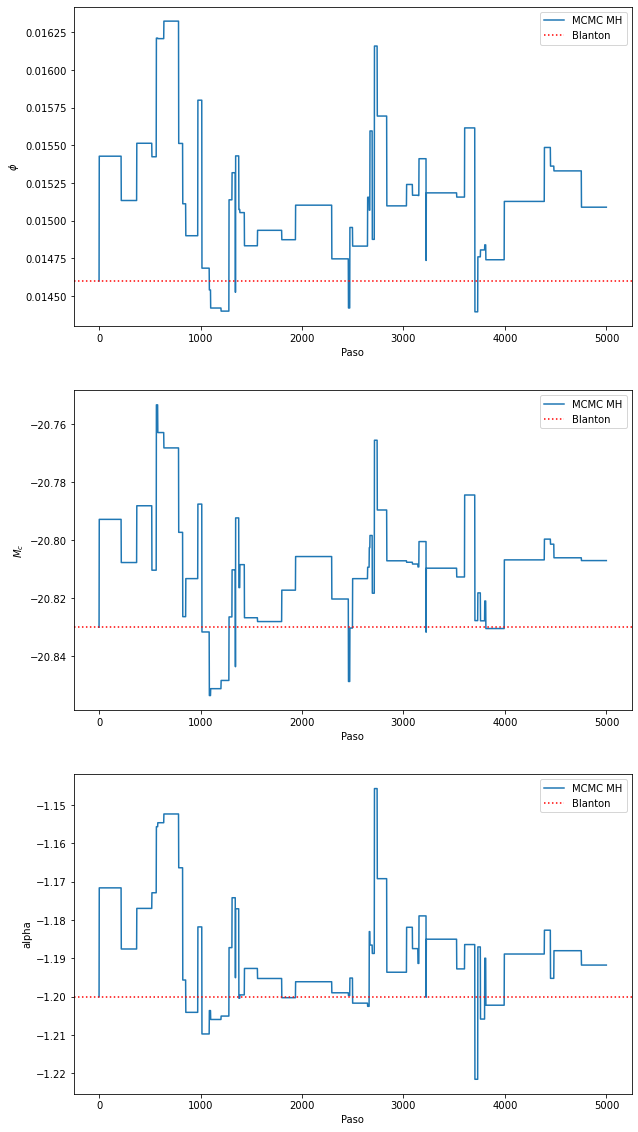

In [98]:
plt.figure(figsize=(10,20))

plt.subplot(3,1,1)
plt.plot(cad_phi,label = 'MCMC MH')
plt.axhline(0.0146, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='upper right')
plt.ylabel('$\phi$')
plt.xlabel('Paso')

plt.subplot(3,1,2)
plt.plot(cad_Mc,label = 'MCMC MH')
plt.axhline(-20.83, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='upper right')
plt.ylabel('$M_c$')
plt.xlabel('Paso')

plt.subplot(3,1,3)
plt.plot(cad_alpha,label = 'MCMC MH')
plt.axhline(-1.2, color='red', label='Blanton', ls="dotted") #valor de Blanton
plt.legend(loc='upper right')
plt.ylabel('alpha')
plt.xlabel('Paso')

plt.savefig('Blanton param vs MCMC MH step',dpi=300,bbox_inches='tight');

In [43]:
#Dejo esto, pero en realidad el mal mixing no es arrancar en buenos valores, sino que no haber hecho un buen reconocimiento del 
#espacio de parámetros. Esto es, puede que alguna de las cadenas caiga indeseadamente en un máximo local de Liklihood.

#No lo hicimos, pero se deduce que existe sólo 1 máximo de Likelihood por la función de Likelihood(theta_i) 
#(que le hice el código a alguna de las pibas, pero yo no lo implementé rip) para cada parámetro.

# Gradiente Descendiente

In [44]:
#Gradiente Descendiente: Dados parámetros iniciales, calc grad(chi^2), evalúo en mis parámetros inic y lso parámetros del prox step serán
#theta_i+1 = theta_i - e*grad(chi^2)|theta_i ('-' porque no quiero en la direc de > crec, sino al revés; 'e' es una cte que puede ser
#= al menor dtheta que defino (por ej, dphi = 0.0001)).

#chi^2 = sum (i hasta n) ((y_i - f(x_i))/sigma_i)^2 ; def sigma_i = f(x_i)/10 => dchi^2/dtheta_k = -2*sum (y_i - f(x_i)/(sigma_i)^2 * df/dtheta_k
#Entonces, escribamos cada derivada:

def chi2(phi,Mc,alpha,M = LF['M'],F = LF['F'],dy = dy):
    chi = 0
    f_model = f(M, Mc, alpha, phi)
    for i in range(len(LF['M'])):
        chi = chi + ((LF['F'][i] - f_model[i])/dy[i])**2     
    return(chi)
    
def df_phi(Mc,alpha,phi,M = LF['M']): #df/dphi
    lista=[]
    for i in range(len(M)):
        y=0.4 * np.log(10) * (10**(-0.4*(M[i]-Mc)*(alpha+1))) * np.exp(-10**(-0.4*(M[i]-Mc)))
        lista.append(y)
    return lista

def df_alpha(Mc,alpha,phi,M = LF['M']): #df/dalpha
    lista=[]
    for i in range(len(M)):
        y= 0.4 * np.log(10) * phi * np.log(10) * (10**(-0.4*(M[i]-Mc)*(alpha+1))) * (-0.4) * (M[i]-Mc) * np.exp(-10**(-0.4*(M[i]-Mc)))
        lista.append(y)
    return lista

def df_Mc(Mc,alpha,phi,M = LF['M']): #df/dMc
    lista=[]
    for i in range(len(M)):
        A = 0.4 * np.log(10) * phi
        B = np.log(10) * (10**(-0.4*(M[i]-Mc)*(alpha+1))) * 0.4 * (alpha+1) * np.exp(-10**(-0.4*(M[i]-Mc)))
        C = (10**(-0.4*(M[i]-Mc)*(alpha+1))) * np.exp(-10**(-0.4*(M[i]-Mc))) * 0.4 * np.log(10) * (10**(-0.4*(M[i]-Mc)))
        y= A * (B - C)
        lista.append(y)
    return lista

In [45]:
chi2(Mc = -20.83,alpha = -1.2,phi = 0.0146) #Para Blanton, muy pequeño

47.7593357867149

In [46]:
chi2(Mc = -22,alpha = -1.3,phi = 0.02) #Para =/= Blanton, muy alto

851978.9115940441

In [47]:
#Hagamos una grilla de todo el dominio (3-D: 100x100x100 divisiones), para luego conocer el valro de chi^2 en cada lugar.
#Podríamos tomar el mismo dominio que el definido para el prior, pero no se nota mucho la diferencia en zonas cercanas a los valroes de Blanton
#Hagamos la división correspondiente, pero de un dominio más acotado

N = 100
_X = np.linspace(0.001,0.024,N)  #phi
_Y = np.linspace(-22.0,-19.5,N)  #Mc
_W = np.linspace(-1.8,-0.8,N)  #alpha
_Z1 = np.zeros((N,N)) #matrices
_Z2 = np.zeros((N,N))
_Z3 = np.zeros((N,N))

for ix,x in enumerate(_X):
    for iy,y in enumerate(_Y):
        _Z1[iy,ix]=chi2(x, y,-1.2)

for ix,x in enumerate(_X):
    for iw,w in enumerate(_W):
        _Z2[iw,ix]=chi2(x, -20.83, w)
        
for iy,y in enumerate(_Y):
    for iw,w in enumerate(_W):
        _Z3[iw,iy]=chi2(0.0146, y, w)

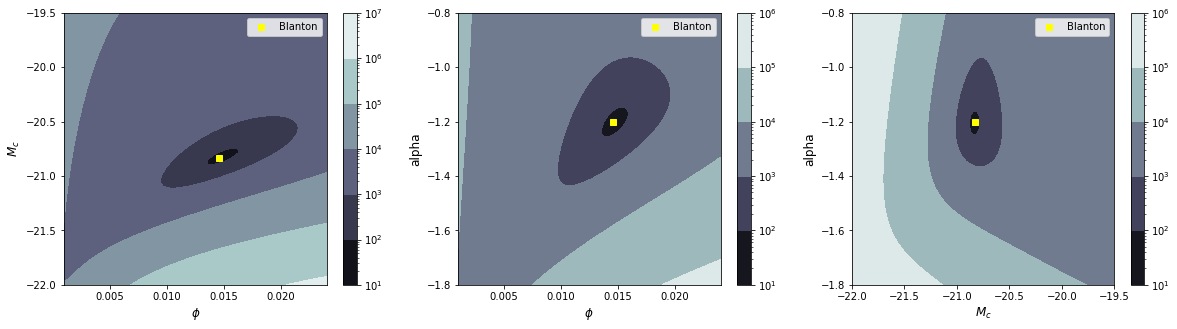

In [59]:
#Veamos entonces parámetro vs parámetro el valor de chi^2:
from matplotlib import ticker

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.contourf(_X,_Y,_Z1,100,cmap=plt.cm.bone,locator=ticker.LogLocator())
plt.colorbar()
plt.plot(0.0146, -20.83, 's', color='yellow', label='Blanton')
plt.xlabel('$\phi$',fontsize='large')
plt.ylabel('$M_c$',fontsize='large')
#plt.title('alpha = -1.2 fijo')
plt.legend()

plt.subplot(1,3,2)
plt.contourf(_X,_W,_Z2,100,cmap=plt.cm.bone,locator=ticker.LogLocator())
plt.colorbar()
plt.plot(0.0146, -1.2, 's', color='yellow', label='Blanton')
plt.xlabel('$\phi$',fontsize='large')
plt.ylabel('alpha',fontsize='large')
#plt.title('$M_c$ = -20.83 fijo')
plt.legend()

plt.subplot(1,3,3)
plt.contourf(_Y,_W,_Z3,100,cmap=plt.cm.bone,locator=ticker.LogLocator())
plt.colorbar()
plt.plot(-20.83, -1.2, 's', color='yellow', label='Blanton')
plt.xlabel('$M_c$',fontsize='large')
plt.ylabel('alpha',fontsize='large')
#plt.title('$\phi$ = 0.0146 fijo')
plt.legend()

plt.savefig('Chi^2 value in param space',dpi=300,bbox_inches='tight');

In [60]:
def gradiente(phi,Mc,alpha,M = LF['M'],F = LF['F'],dy = dy):   #gradiente de chi-cuadrado
    dchi_phi = 0
    dchi_Mc = 0
    dchi_alpha = 0
    f_model = f(M, Mc, alpha, phi)
    dphi = df_phi(Mc,alpha,phi,M)
    dMc = df_Mc(Mc,alpha,phi,M)
    dalpha = df_alpha(Mc,alpha,phi,M)
    
    for i in range(len(M)):
        dchi_phi += - 2 * ((F[i] - f_model[i])/(dy[i]**2)) * dphi[i]
        dchi_Mc += - 2 * ((F[i] - f_model[i])/(dy[i]**2)) * dMc[i]
        dchi_alpha += - 2 * ((F[i] - f_model[i])/(dy[i]**2)) * dalpha[i]
        
    P = np.array([dchi_phi, dchi_Mc, dchi_alpha])
    P = P/(np.linalg.norm(P))

    return(P)  #vector gradiente

In [61]:
gradiente(phi=0.0146, Mc=-20.83, alpha=-1.2) #valores de Blanton

array([-0.99987187,  0.00499906,  0.01520686])

In [63]:
gradiente(Mc = -22,alpha = -1.3,phi = 0.02) #Para =/= Blanton, muy alto

array([ 0.99909678, -0.04139445,  0.00959809])

In [64]:
def grad_desc(eta, n_pasos,M = LF['M'],F = LF['F']):
    
    grad = np.array([0,0,0])
    
    while grad.any() < (1.e-8):
        #parametros iniciales - le doy un rango cercano a los esperados
        phi_i = random.uniform(0.0004, 0.025)
        Mc_i = random.uniform(-21.2, -20.2) 
        alpha_i = random.uniform(-1.5, -0.9)
        
        grad = gradiente(phi_i,Mc_i,alpha_i)
    
    #listas donde guardo los pasos; guardo los valores iniciales
    camino_phi = [phi_i]
    camino_Mc = [Mc_i]
    camino_alpha = [alpha_i]
    
    for i in range(1,n_pasos):
        phi_i += - eta * (grad[0]) * 0.0001 
        Mc_i += - eta * (grad[1]) * 0.01
        alpha_i += - eta * (grad[2]) * 0.001 #son los dtheta mínimos
        
        grad = gradiente(phi_i, Mc_i, alpha_i)
        
        camino_phi.append(phi_i)
        camino_Mc.append(Mc_i)
        camino_alpha.append(alpha_i)
        
    return (camino_phi, camino_Mc, camino_alpha)

In [65]:
j = grad_desc(eta=0.5, n_pasos=2000)

In [66]:
phi_final = j[0][-1]
Mc_final = j[1][-1]
alpha_final = j[2][-1]
print('El valor final para phi:', phi_final)
print('El valor final para Mc:', Mc_final)
print('El valor final para alpha:', alpha_final)

El valor final para phi: 0.015345063002827656
El valor final para Mc: -20.80191456828672
El valor final para alpha: -1.1832000698793286


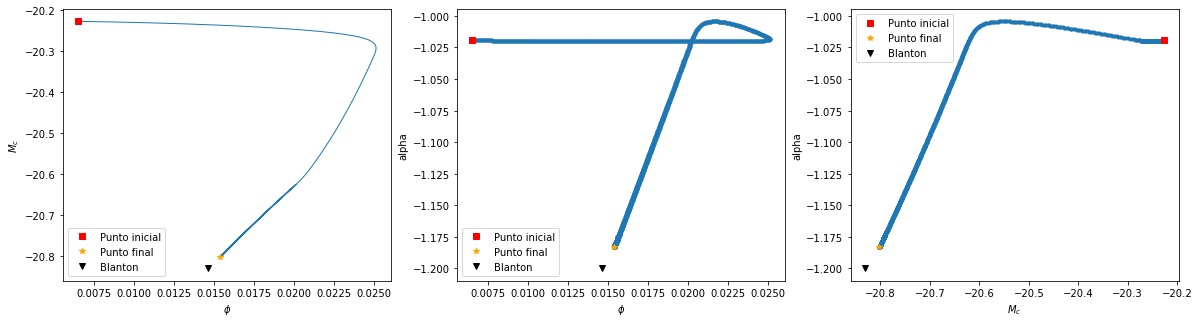

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(j[0], j[1], lw=1)
plt.plot(j[0][0], j[1][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[1][-1], '*', color='orange', label='Punto final') #parametros finales
plt.plot(0.0146,-20.83, 'v', color='black', label='Blanton')
plt.legend(loc='best')
plt.xlabel('$\phi$')
plt.ylabel('$M_c$')

plt.subplot(1,3,2)
plt.plot(j[0], j[2], marker='.')
plt.plot(j[0][0], j[2][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[2][-1], '*', color='orange', label='Punto final') #parametros finales
plt.plot(0.0146,-1.2, 'v', color='black', label='Blanton')
plt.legend(loc='best')
plt.xlabel('$\phi$')
plt.ylabel('alpha')

plt.subplot(1,3,3)
plt.plot(j[1], j[2], marker='.')
plt.plot(j[1][0], j[2][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[1][-1], j[2][-1], '*', color='orange', label='Punto final') #parametros finales
plt.plot(-20.83,-1.2, 'v', color='black', label='Blanton')
plt.legend(loc='best')
plt.xlabel('$M_c$')
plt.ylabel('alpha')

plt.savefig('Grad descend param space walk',dpi=300,bbox_inches='tight');

In [116]:
#Para 2000 pasos, recordar

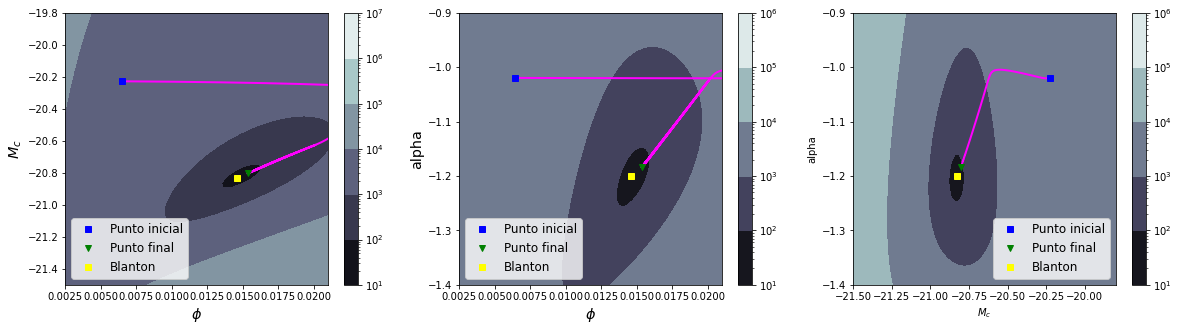

In [79]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.contourf(_X,_Y,_Z1,100,cmap=plt.cm.bone,locator=ticker.LogLocator())
plt.colorbar()
plt.plot(j[0], j[1], lw=2,color='magenta')
plt.plot(j[0][0], j[1][0], 's', color='blue', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[1][-1], 'v', color='green', label='Punto final') #parametros finales
plt.plot(0.0146, -20.83, 's', color='yellow', label='Blanton')
plt.xlabel('$\phi$',fontsize='x-large')
plt.ylabel('$M_c$',fontsize='x-large')
#plt.title('alpha = -1.2 fijo')
plt.xlim(0.0025,0.021)
plt.ylim(-21.5,-19.8)
plt.legend(loc='lower left',fontsize='large')

plt.subplot(1,3,2)
plt.contourf(_X,_W,_Z2,100,cmap=plt.cm.bone,locator=ticker.LogLocator())
plt.colorbar()
plt.plot(j[0], j[2], lw=2,color='magenta')
plt.plot(j[0][0], j[2][0], 's', color='blue', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[2][-1], 'v', color='green', label='Punto final') #parametros finales
plt.plot(0.0146, -1.2, 's', color='yellow', label='Blanton')
plt.xlabel('$\phi$',fontsize='x-large')
plt.ylabel('alpha',fontsize='x-large')
#plt.title('$M_c$ = -20.83 fijo')
plt.xlim(0.0025,0.021)
plt.ylim(-1.4,-0.9)
plt.legend(loc='lower left',fontsize='large')

plt.subplot(1,3,3)
plt.contourf(_Y,_W,_Z3,100,cmap=plt.cm.bone,locator=ticker.LogLocator())
plt.colorbar()
plt.plot(j[1], j[2], lw=2,color='magenta')
plt.plot(j[1][0], j[2][0], 's', color='blue', label='Punto inicial') #parametros iniciales
plt.plot(j[1][-1], j[2][-1], 'v', color='green', label='Punto final') #parametros finales
plt.plot(-20.83, -1.2, 's', color='yellow', label='Blanton')
plt.xlabel('$M_c$')
plt.ylabel('alpha')
plt.xlim(-21.5,-19.8)
plt.ylim(-1.4,-0.9)
#plt.title('$\phi$ = 0.0146 fijo')
plt.legend(loc='lower right',fontsize='large')

plt.savefig('Grad descend param space walk colour 2',dpi=300,bbox_inches='tight');

### Desde más lejos

In [119]:
#Qué pasa si lo tiro más de lejos?

def grad_desc(eta, n_pasos,M = LF['M'],F = LF['F']):
    
    grad = np.array([0,0,0])
    #parametros iniciales - le doy un rango cercano a los esperados
    phi_i = 0.02
    Mc_i = -20
    alpha_i = -0.85
        
    grad = gradiente(phi_i,Mc_i,alpha_i)
    
    #listas donde guardo los pasos; guardo los valores iniciales
    camino_phi = [phi_i]
    camino_Mc = [Mc_i]
    camino_alpha = [alpha_i]
    
    for i in range(1,n_pasos):
        phi_i += - eta * (grad[0]) * 0.0001 
        Mc_i += - eta * (grad[1]) * 0.01
        alpha_i += - eta * (grad[2]) * 0.001 #son los dtheta mínimos
        
        grad = gradiente(phi_i, Mc_i, alpha_i)
        
        camino_phi.append(phi_i)
        camino_Mc.append(Mc_i)
        camino_alpha.append(alpha_i)
        
    return (camino_phi, camino_Mc, camino_alpha)

In [120]:
j = grad_desc(eta=0.5, n_pasos=5000)

phi_final = j[0][-1]
Mc_final = j[1][-1]
alpha_final = j[2][-1]
print('El valor final para phi:', phi_final)
print('El valor final para Mc:', Mc_final)
print('El valor final para alpha:', alpha_final)

El valor final para phi: 0.015278053088340232
El valor final para Mc: -20.80353393557472
El valor final para alpha: -1.1845784923183311


In [121]:
N = 100
_X = np.linspace(0.001,0.040,N)  #phi
_Y = np.linspace(-22.0,-19.5,N)  #Mc
_W = np.linspace(-1.8,-0.8,N)  #alpha
_Z1 = np.zeros((N,N)) #matrices
_Z2 = np.zeros((N,N))
_Z3 = np.zeros((N,N))

for ix,x in enumerate(_X):
    for iy,y in enumerate(_Y):
        _Z1[iy,ix]=chi2(x, y,-1.2)

for ix,x in enumerate(_X):
    for iw,w in enumerate(_W):
        _Z2[iw,ix]=chi2(x, -20.83, w)
        
for iy,y in enumerate(_Y):
    for iw,w in enumerate(_W):
        _Z3[iw,iy]=chi2(0.0146, y, w)

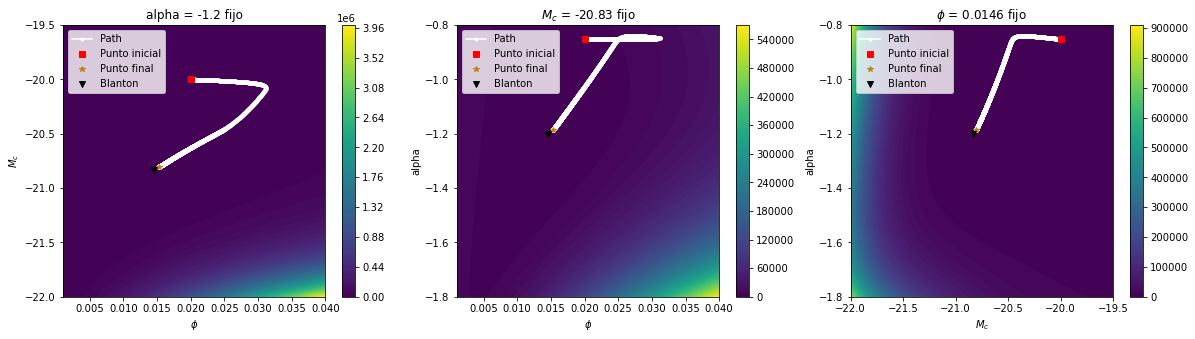

In [127]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.contourf(_X,_Y,_Z1,100)
plt.colorbar()
plt.plot(j[0], j[1], marker='.',label='Path',color='white')
plt.plot(j[0][0], j[1][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[1][-1], '*', color='darkgoldenrod', label='Punto final') #parametros finales
plt.plot(0.0146, -20.83, 'v', color='black', label='Blanton')
plt.xlabel('$\phi$')
plt.ylabel('$M_c$')
plt.title('alpha = -1.2 fijo')
plt.legend()

plt.subplot(1,3,2)
plt.contourf(_X,_W,_Z2,100)
plt.colorbar()
plt.plot(j[0], j[2], marker='.',label='Path',color='white')
plt.plot(j[0][0], j[2][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[0][-1], j[2][-1], '*', color='darkgoldenrod', label='Punto final') #parametros finales
plt.plot(0.0146, -1.2, 'v', color='black', label='Blanton')
plt.xlabel('$\phi$')
plt.ylabel('alpha')
plt.title('$M_c$ = -20.83 fijo')
plt.legend()

plt.subplot(1,3,3)
plt.contourf(_Y,_W,_Z3,100)
plt.colorbar()
plt.plot(j[1], j[2], marker='.',label='Path',color='white')
plt.plot(j[1][0], j[2][0], 's', color='red', label='Punto inicial') #parametros iniciales
plt.plot(j[1][-1], j[2][-1], '*', color='darkgoldenrod', label='Punto final') #parametros finales
plt.plot(-20.83, -1.2, 'v', color='black', label='Blanton')
plt.xlabel('$M_c$')
plt.ylabel('alpha')
plt.title('$\phi$ = 0.0146 fijo')
plt.legend()

plt.savefig('fix Grad descend param space walk colour',dpi=300,bbox_inches='tight');

In [128]:
#un espectáculo. Revisar el loop que hace en algún parámetro y como le cuesta para 1000 y 2000 pasos (en zonas cercanas al mínimo llega lento)